# 1. Import Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


# 2. load and check the dataset

In [77]:
df=pd.read_csv("Maths.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      397 non-null    object
 1   sex         397 non-null    object
 2   age         397 non-null    int64 
 3   address     397 non-null    object
 4   famsize     397 non-null    object
 5   Pstatus     397 non-null    object
 6   Medu        397 non-null    int64 
 7   Fedu        397 non-null    int64 
 8   Mjob        397 non-null    object
 9   Fjob        397 non-null    object
 10  reason      397 non-null    object
 11  guardian    397 non-null    object
 12  traveltime  397 non-null    int64 
 13  studytime   397 non-null    int64 
 14  failures    397 non-null    int64 
 15  schoolsup   397 non-null    object
 16  famsup      397 non-null    object
 17  paid        397 non-null    object
 18  activities  397 non-null    object
 19  nursery     397 non-null    object
 20  higher    

In [79]:
df.shape

(397, 33)

In [80]:
#check the sum of null values at each column
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# 3. Cleaning dataset

In [81]:
#drop unwanted columns
df.drop(columns=["Dalc", "Walc"], axis=1, inplace=True)

In [82]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [83]:
df.shape

(397, 31)

In [84]:
# num of duplicated
print(df.duplicated().sum())

2


In [85]:
# delete duplicated
df.drop_duplicates(inplace=True)
print(df.shape)

(395, 31)


In [86]:
# check  the total sum of null and duplicated data
print(df.isnull().sum().sum())
print(df.duplicated().sum())

0
0


# 4. mapping the target output column

In [87]:
df['status'] = 0

for i in range(len(df)): #the method len(DataFrame) returns the number of rows
    if df.loc[i, 'G3'] >= 10: # the threshold limit here is 10 
        df.loc[i, 'status'] = 1 #passed
    else:
        df.loc[i, 'status'] = 0 #failed

df = df.drop('G3', axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,5,4,6,10,1


# 5. Encoding categorical data

In [88]:
# 1. Label Encoder
label_encoded_df = df.copy()
le = LabelEncoder()

cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic'] #list of ategorical columns

for col in cat_cols:
    label_encoded_df[col] = le.fit_transform(label_encoded_df[col])

print("LabelEncoder completed")
label_encoded_df[cat_cols].head()

LabelEncoder completed


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [89]:
#2. one-hot encoder
onehot_encoded_df = pd.get_dummies(data=df,
                           columns=cat_cols,
                           drop_first=True)  

onehot_encoded_df=onehot_encoded_df.astype('int')

print("Number of columns after one-hot:", onehot_encoded_df.shape[1])
onehot_encoded_df.head()

Number of columns after one-hot: 40


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,3,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,3,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,5,...,0,0,0,1,1,0,1,1,0,0


# 6. Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap')

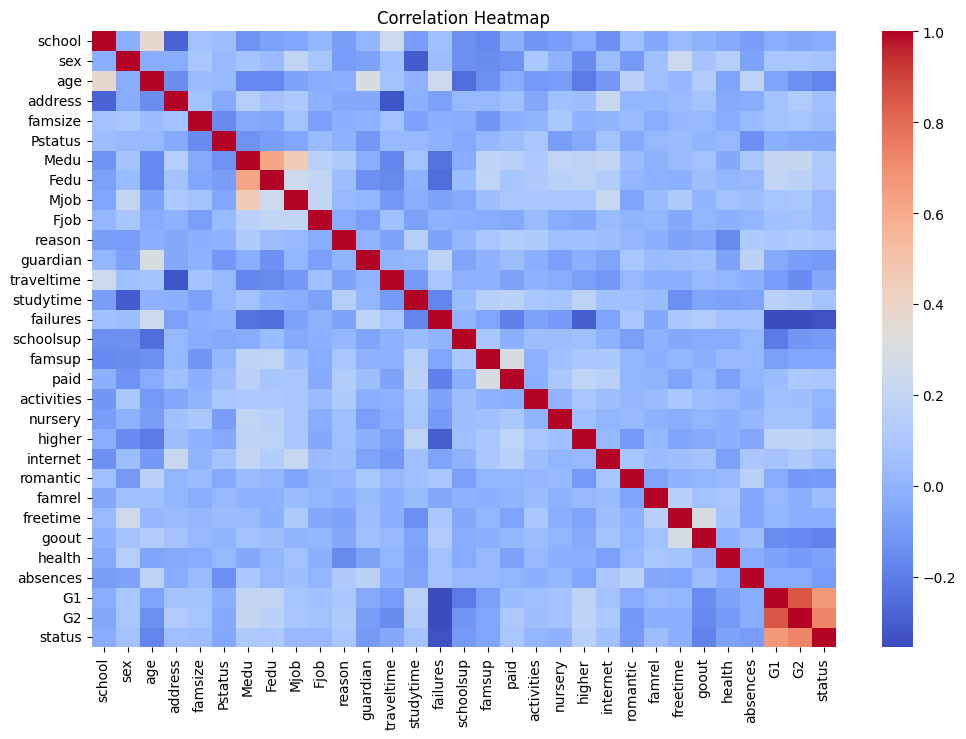

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(label_encoded_df.corr(), cmap="coolwarm" )
plt.title("Correlation Heatmap")

In [91]:
df["status"].value_counts()

status
1    265
0    130
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot of Target output (Pass VS Fail)')

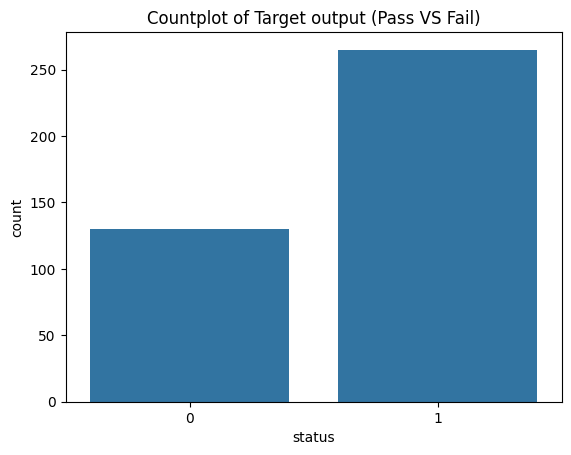

In [92]:
sns.countplot(x="status",data=label_encoded_df)
plt.title("Countplot of Target output (Pass VS Fail)")

# 7. Data Preparation For Model Training

In [93]:
X = label_encoded_df.drop('status', axis=1)
y = label_encoded_df['status']
X.shape, y.shape

((395, 30), (395,))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((316, 30), (79, 30))

In [95]:
# Fit on training only
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Transform test data
X_test_norm = scaler.transform(X_test)

# 8. Training Logistic Model

In [96]:
model = LogisticRegression()
model.fit(X_train_norm, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# 9. check Model Prediction Accuracy

# using Accuracy_Score

In [97]:
# Predict on training data
y_train_pred = model.predict(X_train_norm)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9588607594936709


In [98]:
# Predict on test data
y_test_pred = model.predict(X_test_norm)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9240506329113924


# using Confusion Matrix

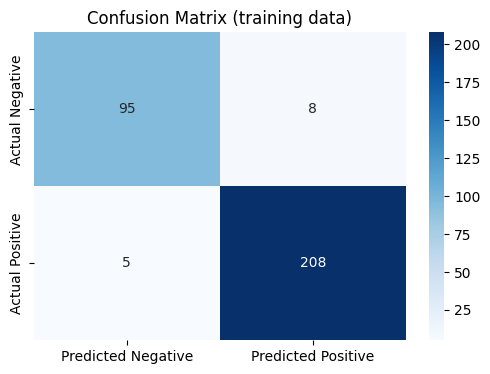

In [99]:
#for training data
cm = confusion_matrix(y_train, y_train_pred)

cm_df = pd.DataFrame(cm,
                     index=["Actual Negative", "Actual Positive" ],
                     columns=["Predicted Negative", "Predicted Positive"])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (training data)")
plt.show()

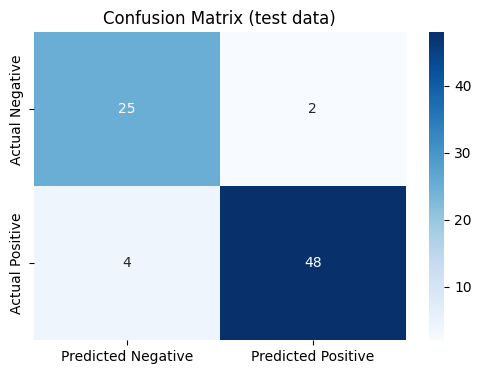

In [100]:
#for test data
cm = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(cm,
                     index=["Actual Negative", "Actual Positive"],
                     columns=["Predicted Negative", "Predicted Positive"])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (test data)")
plt.show()